In [1]:
# Importing Pandas, a data processing and CSV file I/O libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns # Seaborn is a Python data visualization library based on matplotlib.
%matplotlib inline
import pathlib
from datetime import datetime
import math
import sys

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

import xgboost as xg

%matplotlib inline

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import shap as shap


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_base = pd.read_csv('/Users/yashwanthkaruparthi/Developer/energy_demand/research/data/9-basic-feat/feat-basic.csv')

df_eng = pd.read_csv('/Users/yashwanthkaruparthi/Developer/energy_demand/research/data/8-feat-eng/feat-lag.csv')



In [3]:
plt.style.use('bmh')

In [4]:
df_base.head()

,Unnamed: 0,temp,dew_point_temp,rel_hum,visibility,press,daily_demand,hmdxx,year,month,day_of_week,week_of_year,sun_set
0,0,0.575000,-1.387500,87.000000,17.841667,99.075833,14655.208333,-1.884900,1994,1,5,52,17.0
1,1,-8.704167,-12.445833,74.416667,28.387500,99.920000,15783.333333,-12.827363,1994,1,6,52,17.0
2,2,-12.612500,-15.820833,77.250000,10.404167,100.057083,18992.708333,-17.143932,1994,1,0,1,17.0
3,3,-9.833333,-13.570833,74.416667,24.879167,98.675417,19080.708333,-14.183286,1994,1,1,1,17.0
4,4,-11.866667,-16.154167,70.791667,27.033333,99.352083,19183.208333,-16.407695,1994,1,2,1,17.0


In [5]:
df_eng.head()

,Unnamed: 0,index,temp,dew_point_temp,rel_hum,wind_speed,visibility,press,wind_chill,daily_demand,hmdxx,temp_min,temp_max,temp_mean,temp_median,dew_point_temp_min,dew_point_temp_max,dew_point_temp_mean,dew_point_temp_median,rel_hum_min,rel_hum_max,rel_hum_mean,rel_hum_median,visibility_min,visibility_max,visibility_mean,visibility_median,press_min,press_max,press_mean,press_median,hmdxx_min,hmdxx_max,hmdxx_mean,hmdxx_median,week_of_year,day_of_week,year,month,day,temp_roll_mean,temp_roll_std,rel_hum_roll_mean,rel_hum_roll_std,rel_hum_lag_1,wind_speed_lag_1,rel_hum_lag_2,wind_speed_lag_2,rel_hum_lag_3,wind_speed_lag_3,rel_hum_lag_4,wind_speed_lag_4,rel_hum_lag_5,wind_speed_lag_5,rel_hum_lag_6,wind_speed_lag_6,rel_hum_lag_7,wind_speed_lag_7,temp_humidity_interaction,temp_wind_speed_interaction
0,0,0,0.575000,-1.387500,87.000000,20.333333,17.841667,99.075833,-5.888889,14655.208333,-1.884900,-1.8,2.8,0.575000,0.65,-4.8,1.1,-1.387500,-0.65,73.0,99.0,87.000000,86.5,0.8,40.2,17.841667,16.1,98.51,99.91,99.075833,98.840,-4.976663,0.686009,-1.884900,-1.513575,1,3,1970,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.025000,11.691667
1,1,1,-8.704167,-12.445833,74.416667,17.875000,28.387500,99.920000,-16.681818,15783.333333,-12.827363,-14.3,1.7,-8.704167,-9.90,-20.3,0.5,-12.445833,-13.90,60.0,92.0,74.416667,75.5,6.4,40.2,28.387500,25.0,98.77,100.51,99.920000,100.125,-19.165499,-0.338394,-12.827363,-14.393998,1,3,1970,1,1,NaN,NaN,NaN,NaN,87.000000,20.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-647.735069,-155.586979
2,2,2,-12.612500,-15.820833,77.250000,17.666667,10.404167,100.057083,-20.583333,18992.708333,-17.143932,-16.3,-10.3,-12.612500,-12.00,-23.2,-12.6,-15.820833,-15.00,55.0,91.0,77.250000,80.5,1.2,25.0,10.404167,8.0,99.41,100.47,100.057083,100.155,-21.317386,-14.555717,-17.143932,-16.423198,1,3,1970,1,1,NaN,NaN,NaN,NaN,74.416667,17.875000,87.000000,20.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-974.315625,-222.820833
3,3,3,-9.833333,-13.570833,74.416667,25.791667,24.879167,98.675417,-18.541667,19080.708333,-14.183286,-11.5,-7.4,-9.833333,-9.95,-15.0,-11.5,-13.570833,-13.70,57.0,84.0,74.416667,76.0,9.7,40.2,24.879167,24.1,98.27,99.34,98.675417,98.610,-15.874948,-11.706660,-14.183286,-14.310177,1,3,1970,1,1,NaN,NaN,NaN,NaN,77.250000,17.666667,74.416667,17.875000,87.000000,20.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-731.763889,-253.618056
4,4,4,-11.866667,-16.154167,70.791667,22.875000,27.033333,99.352083,-20.521739,19183.208333,-16.407695,-17.5,-7.2,-11.866667,-11.75,-20.8,-10.7,-16.154167,-17.00,56.0,84.0,70.791667,74.0,1.0,40.2,27.033333,25.0,98.44,100.37,99.352083,99.375,-22.394182,-11.256395,-16.407695,-16.464188,1,3,1970,1,1,NaN,NaN,NaN,NaN,74.416667,25.791667,77.250000,17.666667,74.416667,17.875000,87.0,20.333333,NaN,NaN,NaN,NaN,NaN,NaN,-840.061111,-271.450000


In [7]:
df_eng.drop(columns=['Unnamed: 0', 'index'], inplace=True)
df_base.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
df_base.corr()

,temp,dew_point_temp,rel_hum,visibility,press,daily_demand,hmdxx,year,month,day_of_week,week_of_year,sun_set
temp,1.000000,0.962846,-0.133167,0.093990,-0.161779,-0.261225,0.995062,3.116036e-02,2.912525e-01,-0.010621,0.289134,0.751315
dew_point_temp,0.962846,1.000000,0.136138,-0.063937,-0.245513,-0.230640,0.975899,1.138733e-02,3.354078e-01,-0.014103,0.334900,0.661440
rel_hum,-0.133167,0.136138,1.000000,-0.628411,-0.321846,0.100349,-0.071283,-8.230512e-02,1.562555e-01,-0.012055,0.163249,-0.332695
visibility,0.093990,-0.063937,-0.628411,1.000000,0.260418,-0.225136,0.053757,3.278652e-02,4.042959e-02,0.013704,0.036417,0.208912
press,-0.161779,-0.245513,-0.321846,0.260418,1.000000,0.020709,-0.175648,3.343602e-03,4.230308e-02,0.017512,0.041784,-0.093379
daily_demand,-0.261225,-0.230640,0.100349,-0.225136,0.020709,1.000000,-0.215255,-1.185810e-01,-1.722417e-01,-0.328830,-0.167462,-0.264143
hmdxx,0.995062,0.975899,-0.071283,0.053757,-0.175648,-0.215255,1.000000,2.914673e-02,2.903588e-01,-0.012607,0.288569,0.740482
year,0.031160,0.011387,-0.082305,0.032787,0.003344,-0.118581,0.029147,1.000000e+00,1.776491e-14,-0.000023,0.000488,0.022846
month,0.291253,0.335408,0.156255,0.040430,0.042303,-0.172242,0.290359,1.776491e-14,1.000000e+00,0.000618,0.970493,-0.164895
day_of_week,-0.010621,-0.014103,-0.012055,0.013704,0.017512,-0.328830,-0.012607,-2.277857e-05,6.184314e-04,1.000000,0.000741,-0.000202


In [11]:
eng_correlation = df_eng.corr()

<Axes: title={'center': 'Correlation of numeric features with energy daily demand'}>

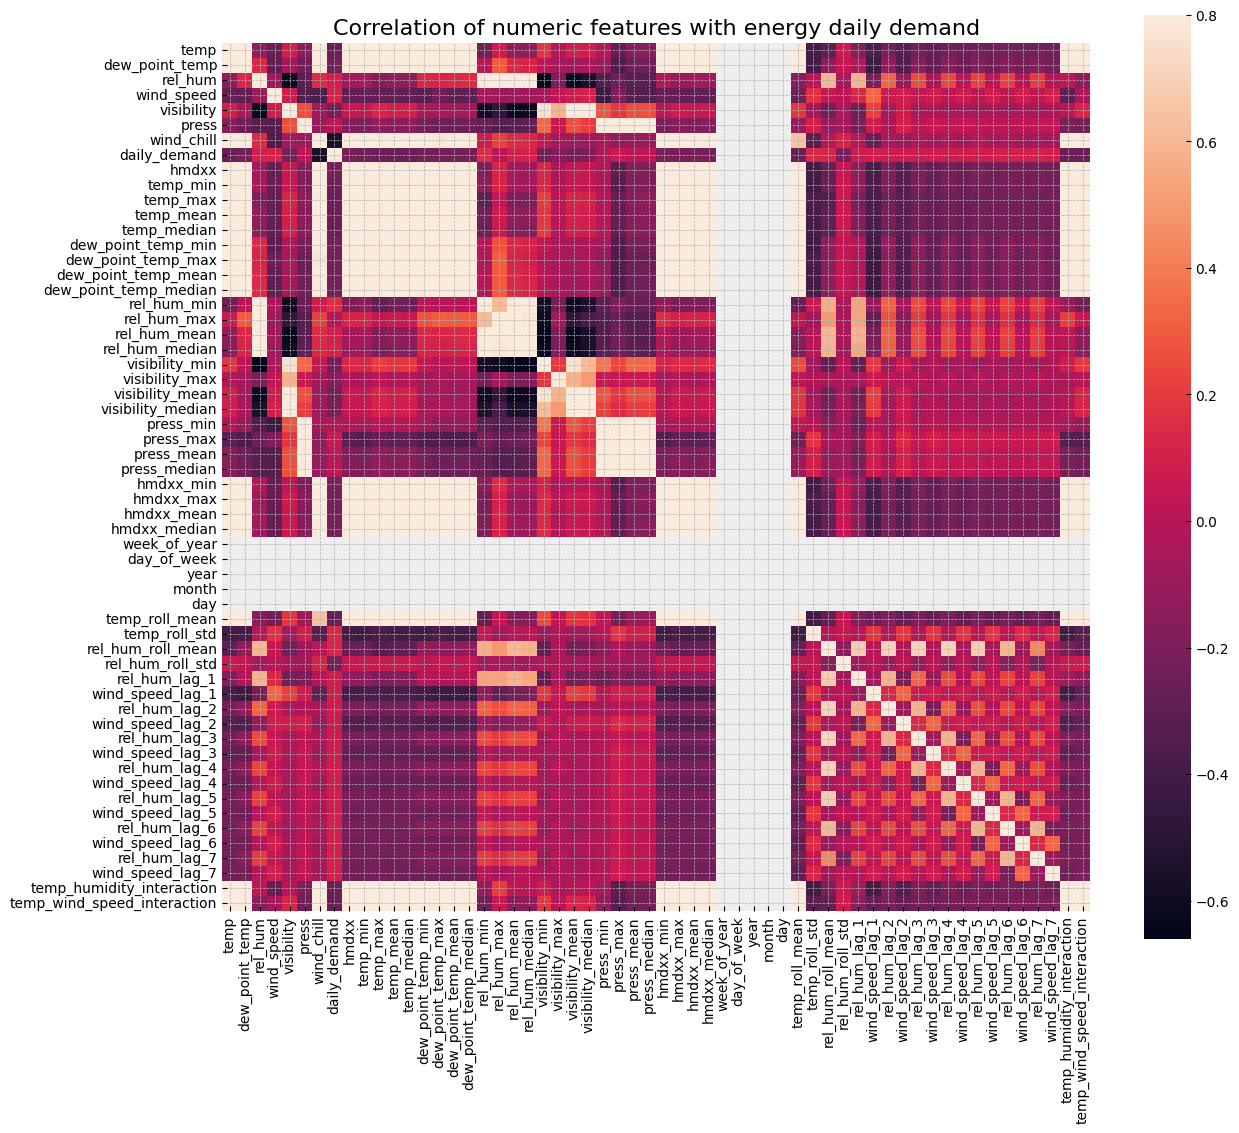

In [12]:
f, ax = plt.subplots(figsize = (14, 12))

plt.title('Correlation of numeric features with energy daily demand', y=1, size=16)
sns.heatmap(eng_correlation, square=True, vmax=0.8)

In [13]:
base_correlation = df_base.corr()

<Axes: title={'center': 'Correlation of numeric features with energy daily demand'}>

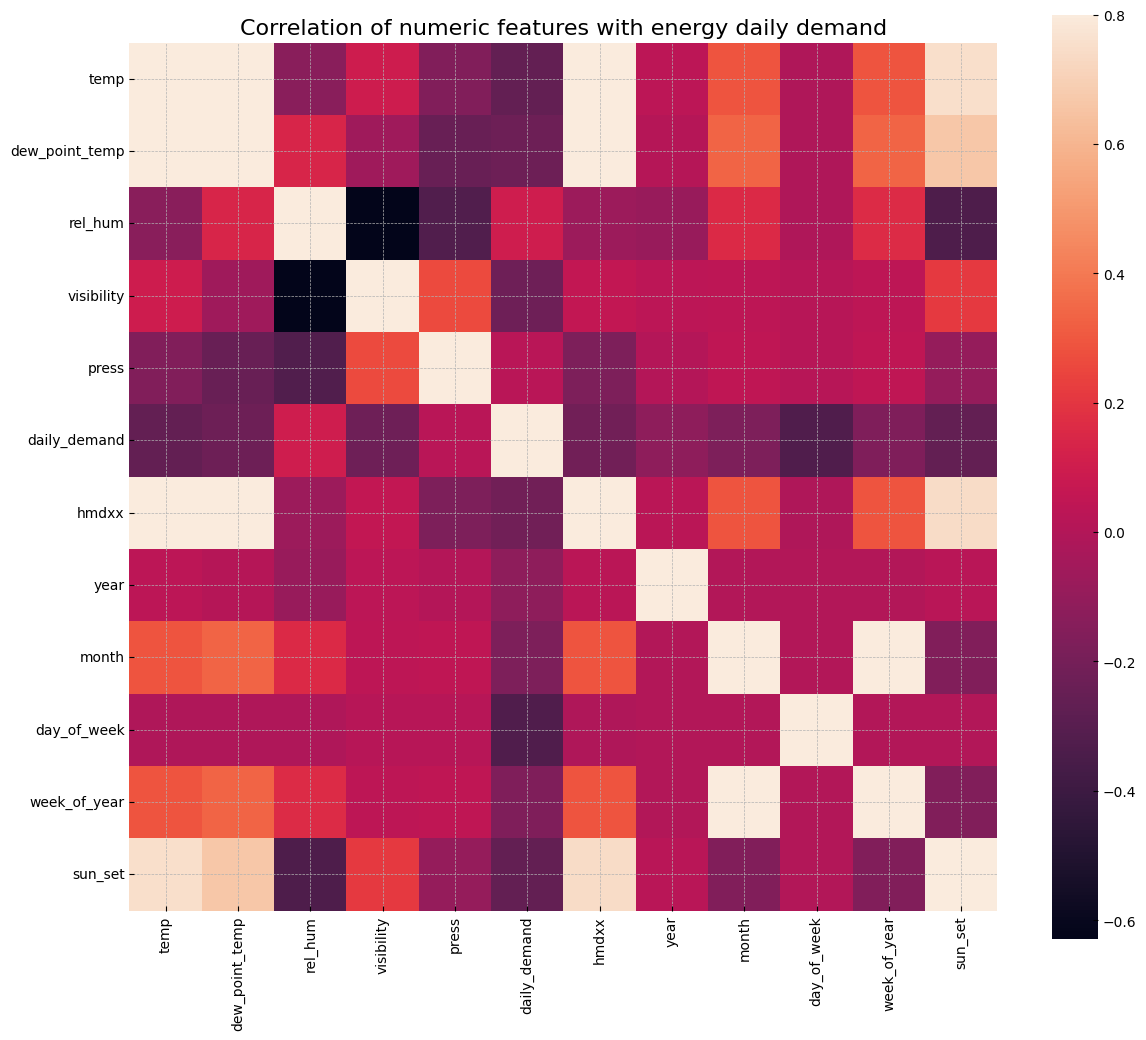

In [14]:
f, ax = plt.subplots(figsize = (14, 12))

plt.title('Correlation of numeric features with energy daily demand', y=1, size=16)
sns.heatmap(base_correlation, square=True, vmax=0.8)

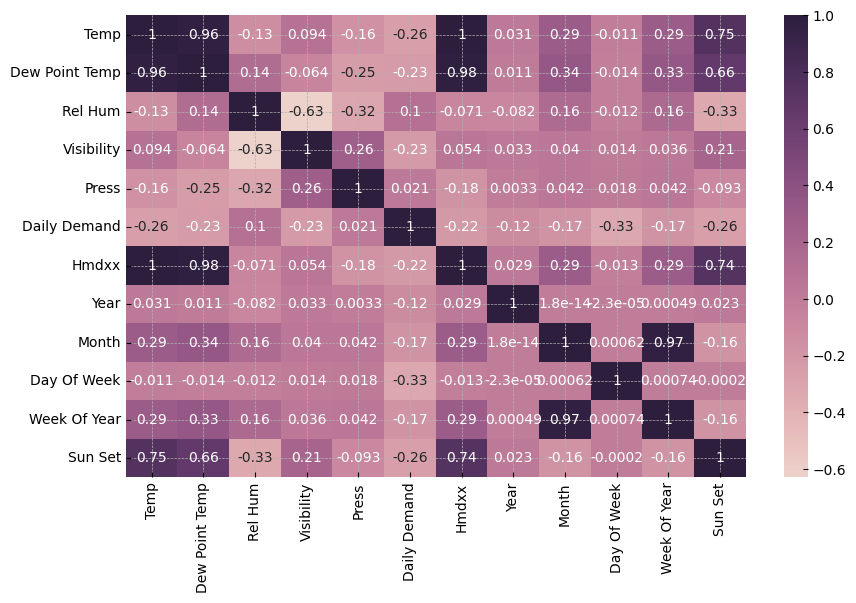

In [9]:
h_labels = [x.replace('_', ' ').title() for x in list(df_base.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(df_base.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)